In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('mytraindataset.csv')
test_df = pd.read_csv('mytestdataset.csv')

TRAIN-TEST SPLIT

In [3]:
from sklearn.model_selection import train_test_split

X_train = train_df.iloc[:,1:]
y_train = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train ,test_size = 0.2, random_state=42)

IMPORTING MODELS AND METRICS

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

acc_random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)

/Users/harun/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test) 

acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)

In [8]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)  

acc_gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

In [9]:
linear_svc = LinearSVC(dual=False)
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)

In [10]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test) 

acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

In [11]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Train Score': [acc_linear_svc_train, acc_knn_train, acc_log_train, acc_random_forest_train,
                   acc_gaussian_train, acc_decision_tree_train],
    'Test Score': [acc_linear_svc_test,acc_knn_test, acc_log_test, acc_random_forest_test,
                   acc_gaussian_test,acc_decision_tree_test]})

result_df = results.sort_values(by='Test Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train Score,Test Score
Model,,
Random Forest,94.10,82.68
Decision Tree,94.10,81.56
Logistic Regression,80.06,80.45
Support Vector Machines,80.90,79.33
Naive Bayes,77.53,79.33
KNN,81.18,77.09


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [13]:
# Grid Search for best parameters

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]      
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)
print("Repor:", classification_report(y_test,y_pred))

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best Score (F1): 0.7431129711070128
Repor:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



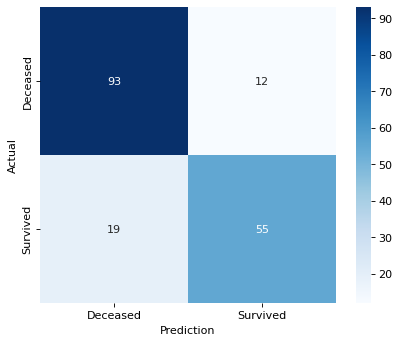

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def make_confusion_matrix(model, threshold=0.5): # Predefined Threshold
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Deceased', 'Survived'],
           yticklabels=['Deceased', 'Survived']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    
make_confusion_matrix(random_forest) # Best Model

In [15]:
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(15)

,Importance
Feature,
Sex,0.304
Fare_Per_Person,0.171
Age_Class,0.090
Deck,0.074
Fare,0.066
Pclass,0.057
Relatives,0.056
Age,0.055
Embarked,0.054


<Axes: xlabel='Feature'>

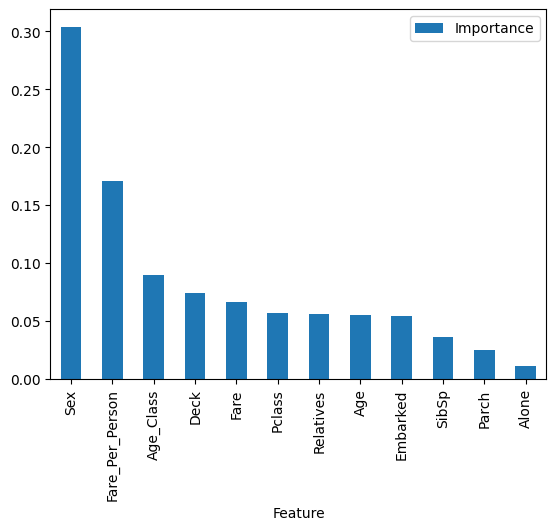

In [16]:
# Checking feature importance

importances.plot.bar()

In [17]:
X_train  = X_train.drop(columns=["Alone","Parch"])
X_test  = X_test.drop(columns=["Alone","Parch"])

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (F1): 0.751724429479409

In [18]:
random_forest = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print("Accuracy:", round(acc_random_forest,2))

Accuracy: 84.36


In [19]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



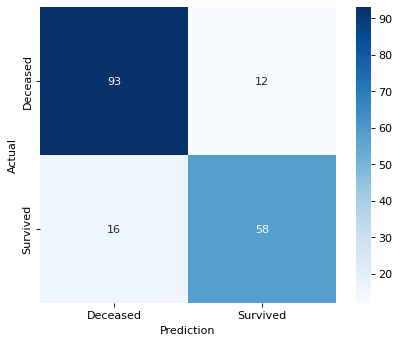

In [20]:
make_confusion_matrix(random_forest)

In [21]:
# We have Relative columns so we can drop Alone and Parch columns

test_df.drop(columns=["Alone","Parch"], inplace=True)

new_pred = random_forest.predict(test_df)

In [22]:
test_df["Prediction"] = new_pred 
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("0","Deceased"))
test_df["Prediction"] = test_df["Prediction"].apply(lambda x: str(x).replace("1","Survived"))

In [23]:
# Predictions about the passengers in the test data set that we obtained from our model.

test_df 

,Pclass,Sex,Age,SibSp,Fare,Embarked,Relatives,Deck,Age_Class,Fare_Per_Person,Prediction
0,3,0,3,0,0,2,0,8,9,7,Deceased
1,3,1,4,1,0,0,1,8,12,3,Deceased
2,2,0,3,0,1,2,0,8,6,9,Deceased
3,3,0,4,0,1,0,0,8,12,8,Deceased
4,3,1,4,1,1,0,2,8,12,4,Deceased
...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,4,0,1,0,0,8,12,8,Deceased
414,1,1,4,0,4,1,0,3,4,108,Survived
415,3,0,3,0,0,0,0,8,9,7,Deceased
416,3,0,4,0,1,0,0,8,12,8,Deceased
